A partir del dataset resultado del TP1 vamos a construir un modelo de regresión lineal que estime el precio por m2 de las propiedades. El modelo puede construirse involucrando sólo un subconjunto del dataset limpio, con algunas características particulares. Por ejemplo, sólo departamentos en los barrios de Belgrano y Palermo ó sólo PHs del barrio de Almagro y Villa Crespo, ó sólo propiedades industriales en Pompeya. El dataset que modelen debe tener al menos 2000 registros.

Seleccionar los datos a modelar. Justificar esa selección.
Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
Determinar la importancia de las features incluidas en la predicción. Interpretar.

# 0.Importamos los datos

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#autenticación de credenciales google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#mi archivo en drive
fileDownloaded = drive.CreateFile({'id':'1uSAHmQ_XibhInDCB1zeCcrkzTIEwGwHV'})
print(fileDownloaded)

GoogleDriveFile({'id': '1uSAHmQ_XibhInDCB1zeCcrkzTIEwGwHV'})


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd

fileDownloaded.GetContentFile("baseCABA1.xlsx")
data = pd.read_excel("baseCABA1.xlsx")


data.head(2)

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,state_name,localidad,ambientes,tamano,preciom2
0,PH,MATADEROS,-34.661824,-58.508839,62000.0,55.0,40.0,CAPITAL FEDERAL,Mataderos,2,N,1127.272727
1,apartment,MATADEROS,-34.652262,-58.522982,72000.0,55.0,55.0,CAPITAL FEDERAL,Mataderos,2,N,1309.090909


In [ ]:
data.shape

(26393, 12)

In [ ]:
data.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'state_name',
       'localidad', 'ambientes', 'tamano', 'preciom2'],
      dtype='object')

In [ ]:
data["state_name"].unique()

array(['CAPITAL FEDERAL'], dtype=object)

In [ ]:
data["place_name"].value_counts()

PALERMO              3431
BELGRANO             2425
RECOLETA             2325
CABALLITO            2047
VILLA URQUIZA        1308
FLORES               1211
VILLA CRESPO         1142
SAN TELMO            1071
ALMAGRO              1008
BALVANERA             752
MONSERRAT             742
CAPITAL FEDERAL       671
NUÑEZ                 651
SAAVEDRA              503
BOEDO                 426
FLORESTA              420
RETIRO                416
VILLA DEL PARQUE      407
MATADEROS             394
BARRACAS              393
VILLA LURO            374
LINIERS               372
SAN CRISTOBAL         369
VILLA DEVOTO          355
COLEGIALES            341
PUERTO MADERO         295
PARQUE PATRICIOS      283
SAN NICOLAS           254
COGHLAN               237
CHACARITA             201
CONSTITUCION          196
BOCA                  196
VILLA LUGANO          188
VILLA PUEYRREDON      158
PATERNAL              150
PARQUE CHACABUCO      131
VILLA ORTUZAR          75
MONTE CASTRO           66
PARQUE AVELL

# 1. Selección del conjunto de datos

Se decide tomar las propiedades de capital, debido a que la mayoria de propiedades se encuentran ahi, se toman las propiedades que se encuentran en Palermo, Belgrano,Recoleta y Caballito debido a que son las localidades con mayor numero de propiedades

In [ ]:
mascaraBarrios1 = (data["place_name"] == "PALERMO") | (data["place_name"] == "RECOLETA") | (data["place_name"] == "CABALLITO") | (data["place_name"] == "BELGRANO")
dataBarrios_1 = data[mascaraBarrios1]

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para cada variable

datos_palermo = dataBarrios_1.loc[dataBarrios_1['place_name'] == 'PALERMO', 'preciom2']
datos_recoleta = dataBarrios_1.loc[dataBarrios_1['place_name'] == 'RECOLETA', 'preciom2']
datos_belgrano = dataBarrios_1.loc[dataBarrios_1['place_name'] == 'BELGRANO', 'preciom2']
datos_caballito = dataBarrios_1.loc[dataBarrios_1['place_name'] == 'CABALLITO', 'preciom2']

# Configurar el tamaño y el diseño del gráfico
plt.figure(figsize=(8, 6))

# Crear los histogramas para cada variable
plt.hist(datos_palermo, bins=300, density=True, alpha=0.5, label='PALERMO')
plt.hist(datos_recoleta, bins=300, density=True, alpha=0.5, label='RECOLETA')
plt.hist(datos_belgrano, bins=300, density=True, alpha=0.5, label='BELGRANO')
plt.hist(datos_caballito, bins=300, density=True, alpha=0.5, label='CABALLITO')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de precios por metro cuadrado en diferentes barrios')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

NameError: ignored

In [ ]:
!pip install joypy

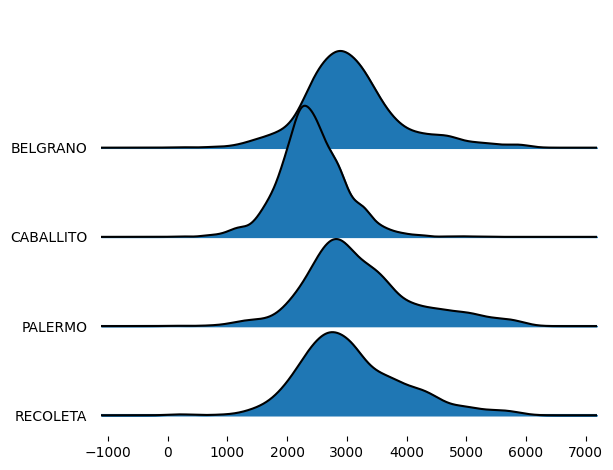

In [ ]:
# Analisis de precio por metro cuadrado de los barrios seleccionados en primer punto

import joypy
fig, ax = joypy.joyplot(dataBarrios_1, by = "place_name", column = "preciom2")

In [ ]:
# Verificamos las columnas del nuevo dataset

dataBarrios_1.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'state_name',
       'localidad', 'ambientes', 'tamano', 'preciom2'],
      dtype='object')

In [ ]:
# Analisis de la integridad de variables del dataset

import seaborn as sns
sns.set_theme(style="ticks")
graf_ = dataBarrios_1[['preciom2','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','ambientes','place_name']]

sns.pairplot(graf_, hue="place_name")

NameError: ignored

## 1.1. Prueba  1 de selección
### 1.1.1. Correlación
se realiza el **correlograma**

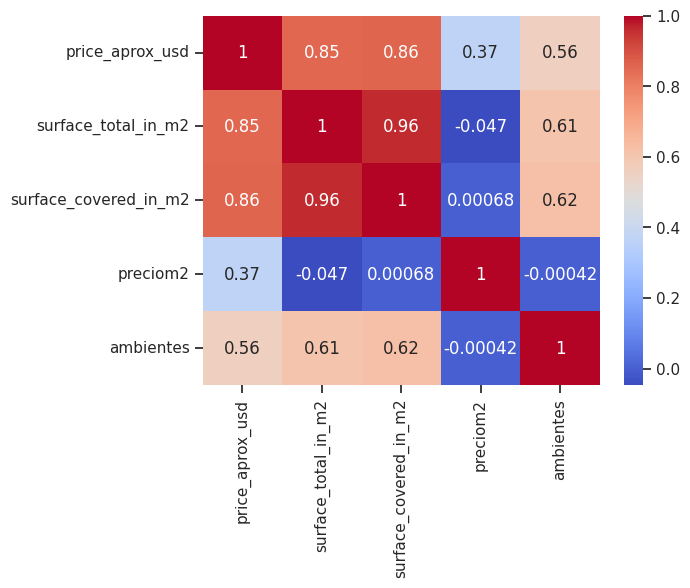

In [ ]:
# Analisis de correclacion con mapa de calor de las principales variables que nos interesan.

import seaborn as sns
import matplotlib.pyplot as plt

data1 = dataBarrios_1[["price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","preciom2","ambientes"]]
correlation_matrix = data1.corr()

# Crear el correlograma utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

### 1.1.2. Regresion lineal simple

Se entiende que el precio no se tendria en el dataset de test pues no se buscaria predecir el precio del metro cuadrado si ya se tiene el precio previamente, se prueba primero una regresion lineal simple

In [ ]:
# Load python packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as sm2
from sklearn import datasets, linear_model


# packages for regularization
from sklearn.linear_model import Lasso
from math import pow, sqrt

import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns

!pip install joypy
import joypy

np.random.seed(1234)

In [ ]:
# Se coonfoam un dataset para la primer regresion lineal
rls = dataBarrios_1.loc[:, ['surface_total_in_m2','price_aprox_usd','preciom2']]
#rls.head()

In [ ]:
# Se define la variable dependiente
y = rls['preciom2']

# Se define la variable independiente que es superficie total
X = rls.drop(['price_aprox_usd', 'preciom2'], axis=1)

# Add an intercept term to the independent variables
X= sm.add_constant(X)

#En resumen, agregar una constante a la matriz de características permite
#estimar el término de sesgo (intercepto) en un modelo de regresión lineal.
#Esto asegura que el modelo tenga en cuenta el valor medio de la variable
#dependiente cuando todas las variables independientes son iguales a cero.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_m2= sm.OLS(endog = y_train,exog = X_train).fit()

print(model_m2.summary())

                            OLS Regression Results                            
Dep. Variable:               preciom2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.35
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           0.000444
Time:                        18:07:14   Log-Likelihood:                -66962.
No. Observations:                8182   AIC:                         1.339e+05
Df Residuals:                    8180   BIC:                         1.339e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3027.5293    

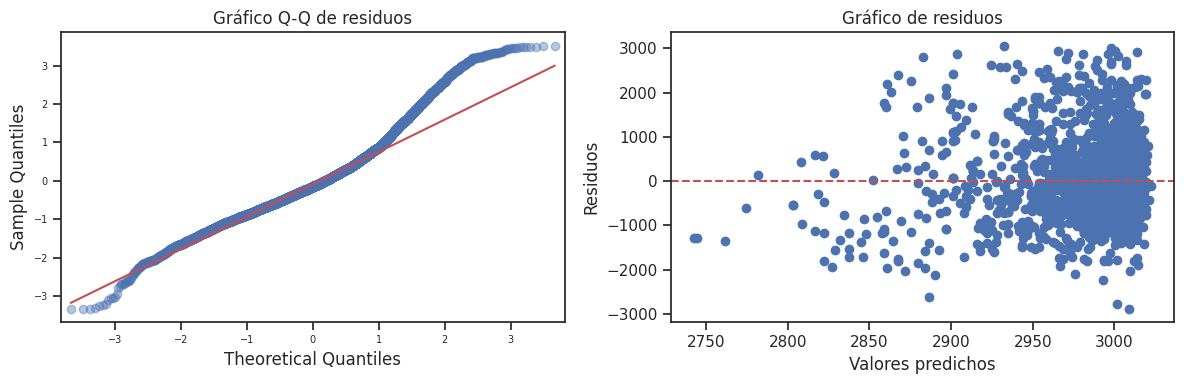

In [ ]:
# Análisis de residuos de la primer regresion lineal simple

y_pred = model_m2.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})


df_ej2 = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ej2["residuos"]=real_values["real"]-predicted_values["pre"]
df_ej2["residuos2"]=df_ej2["residuos"]**2
#df_ej2["residuos2"].sort_values()


import statsmodels.api as sm
residuals = model_m2.resid # On accède aux résidus du modèle

import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model_m2.resid

# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(residuals, fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ej2["pre"],df_ej2["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

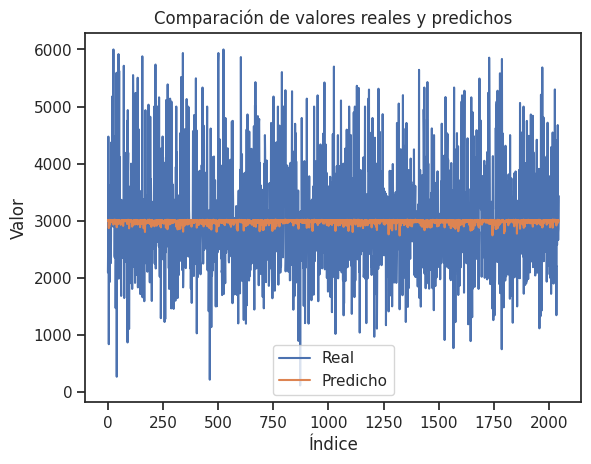

In [ ]:
y_pred = model_m2.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

el modelo tiene problemas de dispersión irregular. En todos los casos la varianza de los residuos aumenta con los valores ajustados, esto indica que la variabilidad de los errores aumenta al aumentar su media. No se esta cumpliendo el supuesto de HOMOCEDAS


## 1.2  Prueba 2 de selección

Cambiamos de barrios, Cabillito, Almagro y Villa Crespo tienen  caracteristicas similares en cuanto a precios y superficies. Ver gráfico de análisis de precio de m2 por barrio


In [ ]:
# Se define un segundo dataset con los nuevo barrios a ser analizados

mascaraBarrios2 = (data["place_name"] == "CABALLITO") | (data["place_name"] == "ALMAGRO") | (data["place_name"] == "VILLA CRESPO")
dataBarrios_2 = data[mascaraBarrios2]


In [ ]:
# mascara2 = dataBarrios_2['property_type']=="apartment"
# dataBarrios_2 = dataBarrios_2[mascara2]

In [ ]:
dataBarrios_2.shape

(4197, 12)

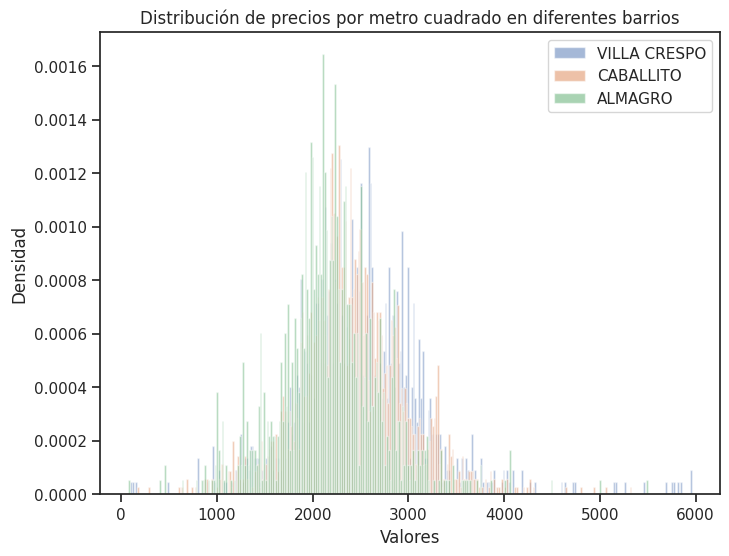

In [ ]:
# Filtrar los datos para cada variable
datos_villa_crespo = dataBarrios_2.loc[dataBarrios_2['place_name'] == 'VILLA CRESPO', 'preciom2']
datos_caballito = dataBarrios_2.loc[dataBarrios_2['place_name'] == 'CABALLITO', 'preciom2']
datos_almagro = dataBarrios_2.loc[dataBarrios_2['place_name'] == 'ALMAGRO', 'preciom2']

# Configurar el tamaño y el diseño del gráfico
plt.figure(figsize=(8, 6))

# Crear los histogramas para cada variable
plt.hist(datos_villa_crespo, bins=300, density=True, alpha=0.5, label='VILLA CRESPO')
plt.hist(datos_caballito, bins=300, density=True, alpha=0.5, label='CABALLITO')
plt.hist(datos_almagro, bins=300, density=True, alpha=0.5, label='ALMAGRO')


# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución de precios por metro cuadrado en diferentes barrios')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()








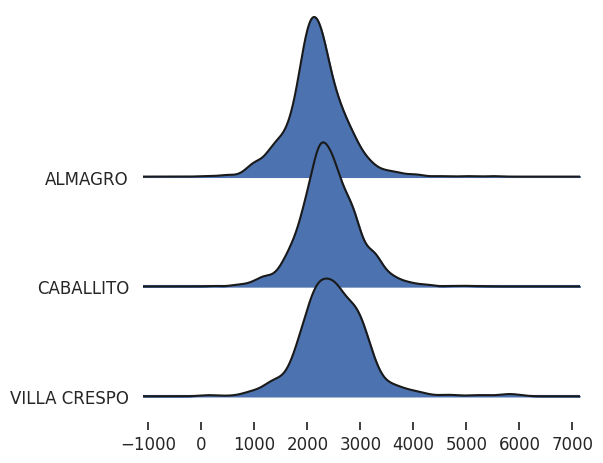

In [ ]:
fig, ax = joypy.joyplot(dataBarrios_2, by = "place_name", column = "preciom2")



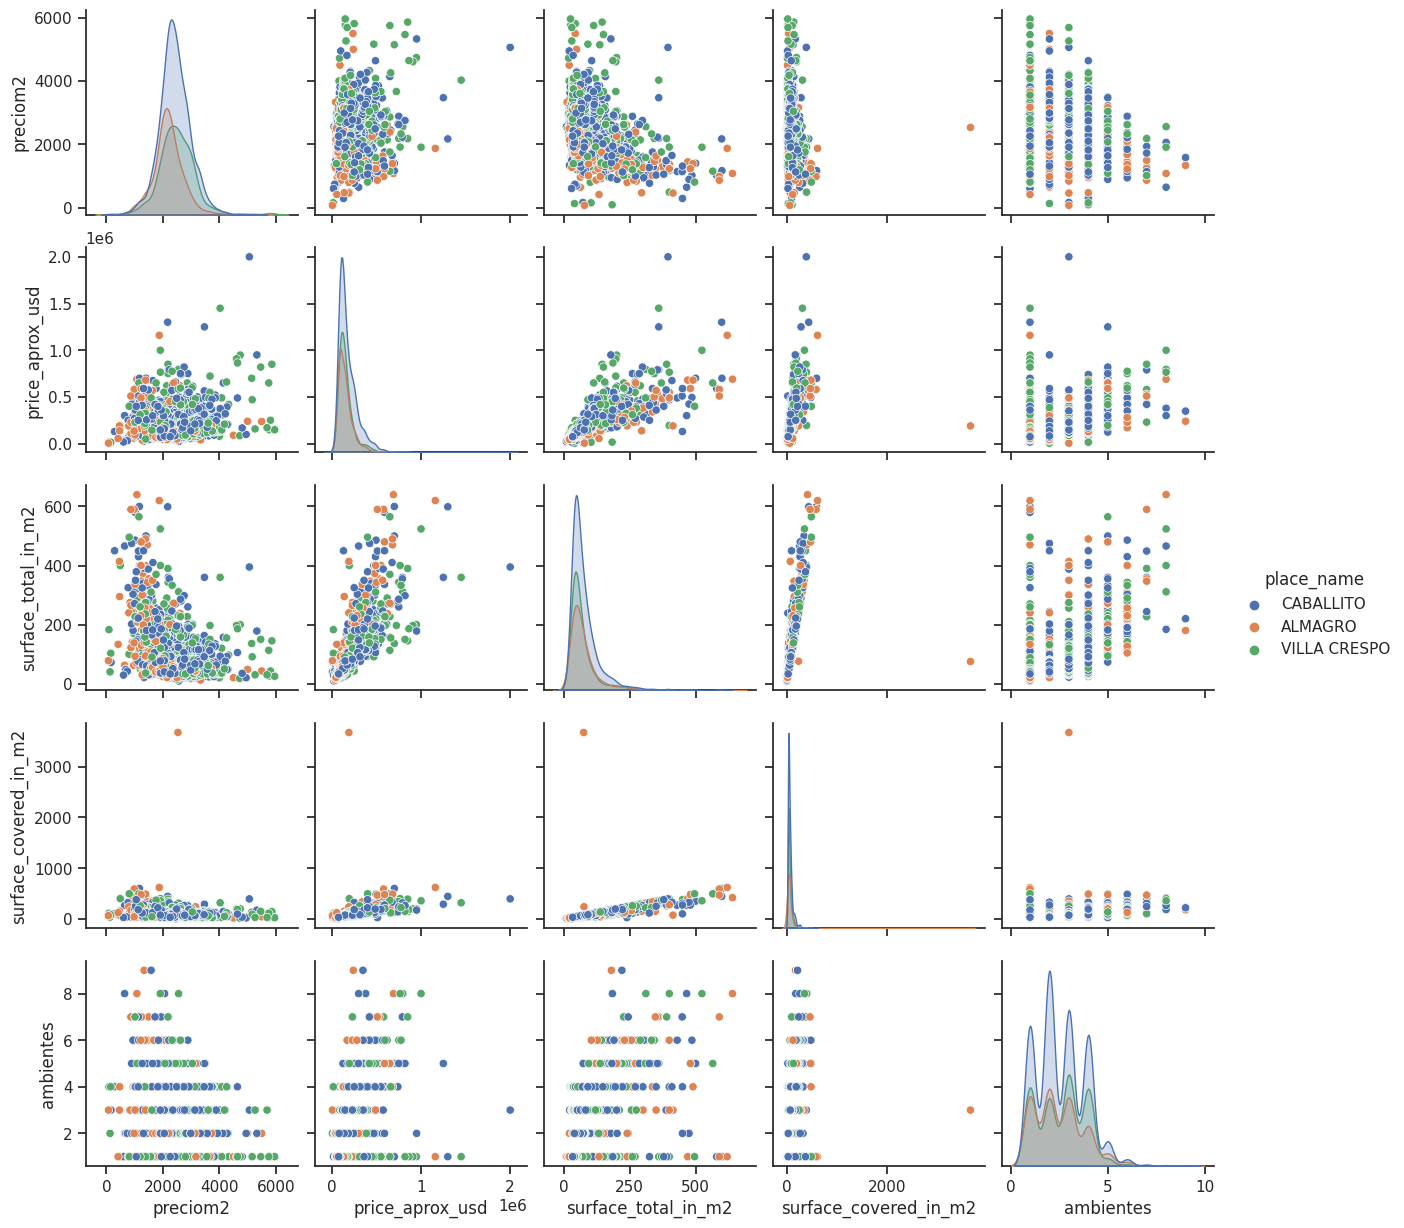

In [ ]:
sns.set_theme(style="ticks")
graf_ = dataBarrios_2[['preciom2','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','ambientes','place_name']]

sns.pairplot(graf_, hue="place_name")

In [ ]:
#dataBarrios.to_excel("dataBarrios.xlsx", index=False)
#dataBarrios = pd.read_excel("dataBarrios.xlsx")

### 1.2.1 Segmentación de datos

In [ ]:
#sns.pairplot(dataBarrios[["price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","preciom2"]])

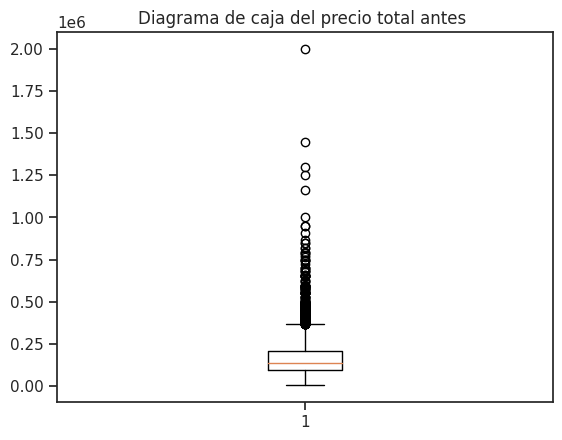

In [ ]:

# Crear el box plot con Matplotlib
plt.boxplot(dataBarrios_2["price_aprox_usd"])

# Título del gráfico
plt.title('Diagrama de caja del precio total antes ')

# Mostrar el gráfico
plt.show()

In [ ]:
mascara3 = dataBarrios_2['price_aprox_usd']<200000
dataBarrios_2 = dataBarrios_2[mascara3]

In [ ]:
mascara4=dataBarrios_2['price_aprox_usd']>40000
dataBarrios_2=dataBarrios_2[mascara4]

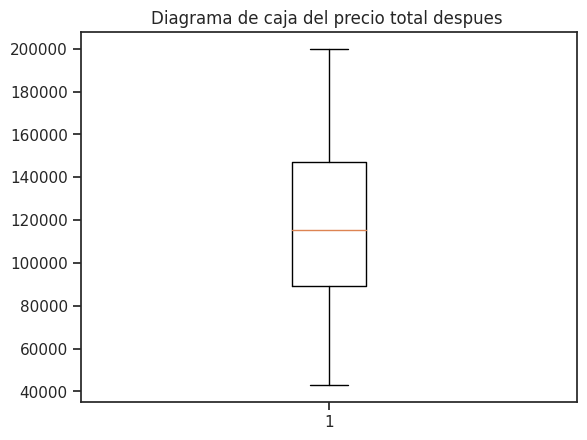

In [ ]:

# # Crear el box plot con Matplotlib
plt.boxplot(dataBarrios_2["price_aprox_usd"])

# Título del gráfico
plt.title('Diagrama de caja del precio total despues ')

# Mostrar el gráfico
plt.show()

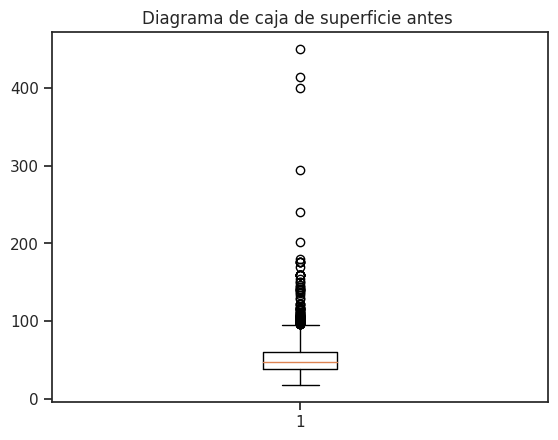

In [ ]:

# Crear el box plot con Matplotlib
plt.boxplot(dataBarrios_2["surface_total_in_m2"])

# Título del gráfico
plt.title('Diagrama de caja de superficie antes ')

# Mostrar el gráfico
plt.show()

In [ ]:
# mascara5=dataBarrios_2['surface_total_in_m2']<100
# dataBarrios_2=dataBarrios_2[mascara5]

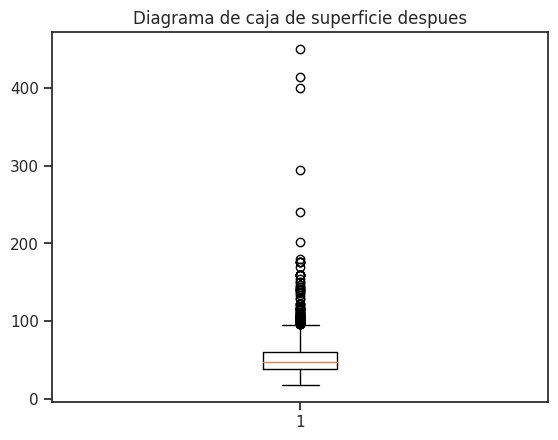

In [ ]:
# Crear el box plot con Matplotlib
plt.boxplot(dataBarrios_2["surface_total_in_m2"])

# Título del gráfico
plt.title('Diagrama de caja de superficie despues')

# Mostrar el gráfico
plt.show()

In [ ]:
dataBarrios_2.shape

(3104, 12)

### 1.2.2 Correlación

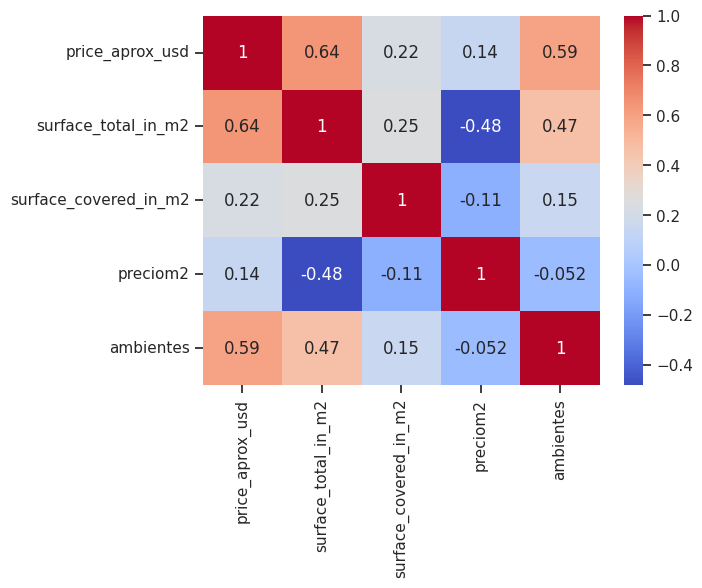

In [ ]:
data = dataBarrios_2[["price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","preciom2","ambientes"]]
correlation_matrix = data.corr()

# Crear el correlograma utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

### 1.2.3.  Regresion lineal simple
Se entiende que el precio no se tendria en el dataset de test pues no se buscaria predecir el precio del metro cuadrado si ya se tiene el precio previamente, se prueba primero una regresion lineal simple

In [ ]:
#s e filtra solo por area y precio
rls = dataBarrios_2.loc[:, ['surface_total_in_m2','price_aprox_usd','preciom2']]
#rls.head()

Se realiza una regresion lienal solo teniendo en cuenta la superficie total como feature

In [ ]:
# Se define la variable dependiente
y = rls['preciom2']

# Se define la variable independiente
X = rls.drop(['price_aprox_usd', 'preciom2'], axis=1)

# Add an intercept term to the independent variables
X= sm.add_constant(X)

#En resumen, agregar una constante a la matriz de características permite
#estimar el término de sesgo (intercepto) en un modelo de regresión lineal.
#Esto asegura que el modelo tenga en cuenta el valor medio de la variable
#dependiente cuando todas las variables independientes son iguales a cero.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model_m3= sm.OLS(endog = y_train,exog = X_train).fit()

print(model_m3.summary())

                            OLS Regression Results                            
Dep. Variable:               preciom2   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     722.1
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          7.94e-140
Time:                        18:07:47   Log-Likelihood:                -18747.
No. Observations:                2483   AIC:                         3.750e+04
Df Residuals:                    2481   BIC:                         3.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2910.5078    

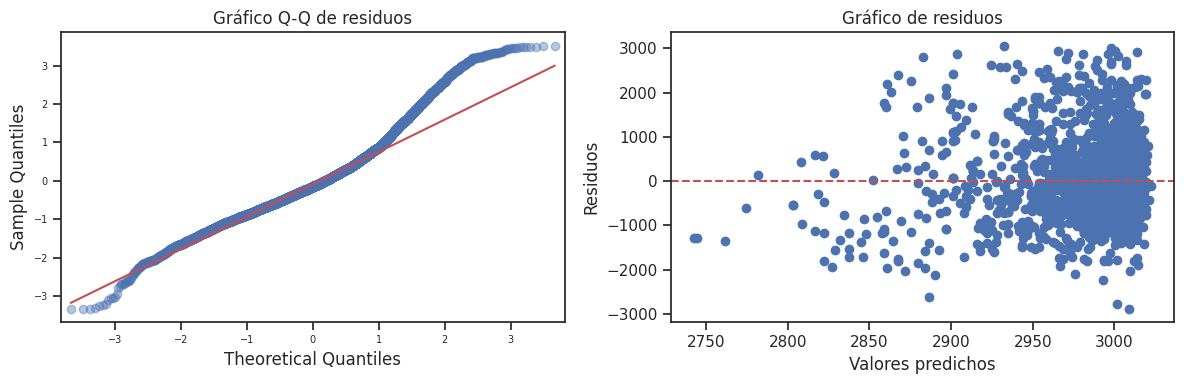

In [ ]:
# Analisis de los residuos

#residuals = model_m3.resid

# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(residuals, fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ej2["pre"], df_ej2["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

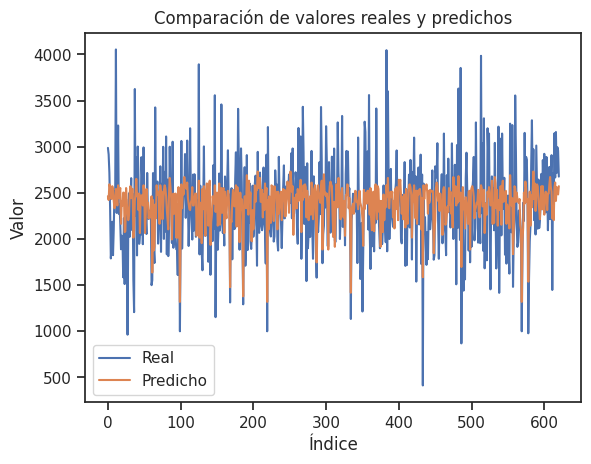

In [ ]:
y_pred = model_m3.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

### 1.2.5. probar polinomios

se decide probar con polinomios:
ajustar modelos de regresión lineal polinomial de diferentes grados y visualizar las predicciones en los conjuntos de datos de entrenamiento y prueba.

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):

    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)


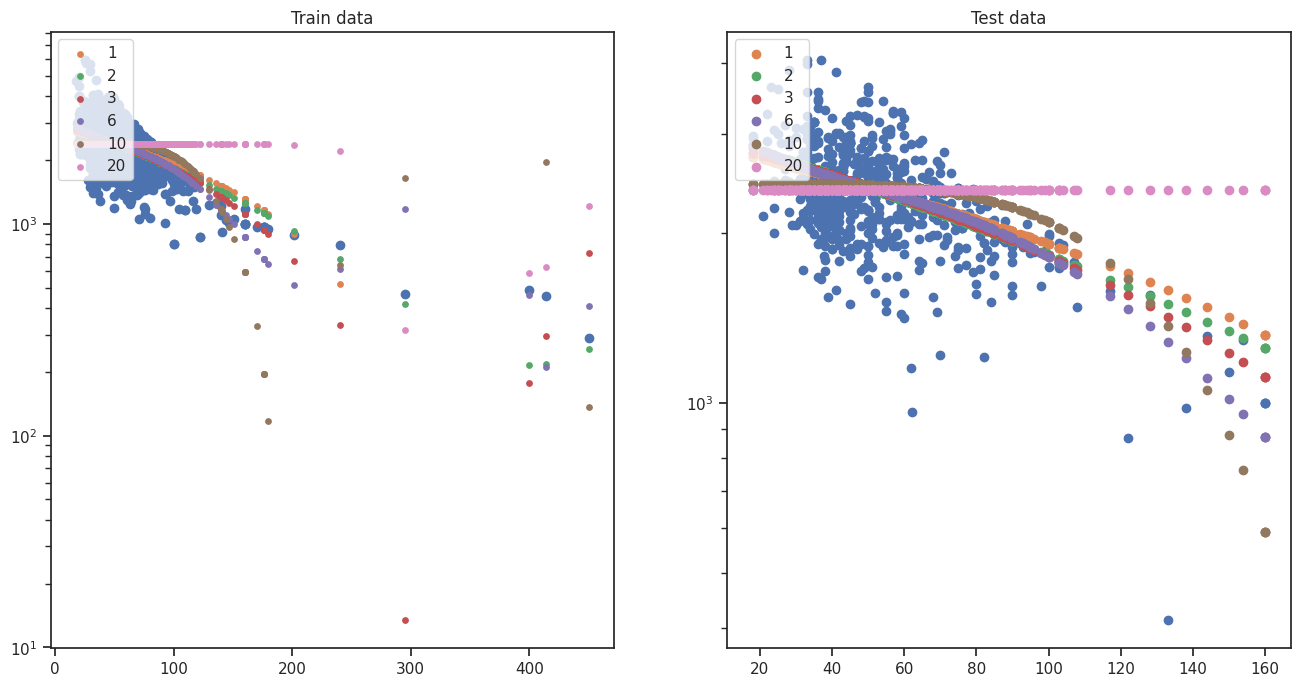

In [ ]:

# visualizar predicciones de trenes y pruebas
# tenga en cuenta que el eje y está en una escala logarítmica
# Se define la variable dependiente
y = rls['preciom2']

# Se define la variable independiente
X = rls.drop(['price_aprox_usd', 'preciom2'], axis=1)

# Agregar un término de intersección a las variables independientes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)

#Los ejes y de los gráficos de dispersión se transforman a una escala logarítmica
#utilizando plt.yscale('log'). Esta transformación se realiza en los gráficos para
# visualizar de manera más clara la relación entre las variables.

#La transformación logarítmica se utiliza cuando hay una amplia gama de valores
#en el eje y, y esos valores abarcan varios órdenes de magnitud.
# Al aplicar una escala logarítmica, los cambios relativos en los valores
#se vuelven más visibles y se pueden apreciar las diferencias en los extremos de
#la escala.

plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')

# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
# compare r2 for train and test sets (for all polynomial fits)
# importamos todas las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree,
                                                                         train_r2,
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.23, test score=0.26
Polynomial degree 2: train score=0.24, test score=0.26
Polynomial degree 3: train score=0.24, test score=0.27
Polynomial degree 6: train score=0.25, test score=0.27
Polynomial degree 10: train score=0.15, test score=0.18
Polynomial degree 20: train score=0.02, test score=-0.0


# 2. Regresion teniendo en cuenta todos los features (precio total)

##2.1 Regresion lineal multiple con precio_aprox_usd como feature





In [ ]:
dataDummies = pd.get_dummies(dataBarrios_2[["place_name",'property_type']], drop_first=True)
#dataDummies_1 = pd.get_dummies(dataBarrios_2["ambientes"], drop_first=True)
dataUnida = pd.concat([dataBarrios_2, dataDummies], axis=1)
#dataUnida = pd.concat([dataUnida, dataDummies_1], axis=1)
dataUnida.head()

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,state_name,localidad,ambientes,tamano,preciom2,place_name_CABALLITO,place_name_VILLA CRESPO,property_type_apartment,property_type_house,property_type_store
16,apartment,CABALLITO,-34.622211,-58.439128,110000.0,50.0,50.0,CAPITAL FEDERAL,Caballito,3,N,2200.000000,1,0,1,0,0
17,apartment,CABALLITO,-34.623894,-58.446861,170500.0,100.0,46.0,CAPITAL FEDERAL,Caballito,2,N,1705.000000,1,0,1,0,0
20,apartment,CABALLITO,-34.628786,-58.427783,108000.0,70.0,67.0,CAPITAL FEDERAL,Caballito,3,N,1542.857143,1,0,1,0,0
24,apartment,ALMAGRO,NaN,NaN,109900.0,50.0,40.0,CAPITAL FEDERAL,Almagro,2,N,2198.000000,0,0,1,0,0
32,apartment,CABALLITO,-34.620725,-58.438704,128000.0,51.0,51.0,CAPITAL FEDERAL,Caballito,2,N,2509.803922,1,0,1,0,0


In [ ]:
# Define the dependent variable
y = dataUnida['preciom2']

# Define the independent variables
X = dataUnida.drop(['tamano', 'place_name', 'property_type', 'preciom2', 'lat', 'lon', 'state_name', 'localidad','surface_covered_in_m2'], axis=1)

# Add an intercept term to the independent variables
X= sm.add_constant(X)
X['surface_total_in_m22'] =X['surface_total_in_m2'] ** 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model1 = sm.OLS(endog = y_train,exog = X_train).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               preciom2   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1626.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:07:53   Log-Likelihood:                -16663.
No. Observations:                2483   AIC:                         3.335e+04
Df Residuals:                    2473   BIC:                         3.340e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [ ]:
y_test

y_pred = model1.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})


df_ej3 = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ej3["residuos"]=real_values["real"]-predicted_values["pre"]
df_ej3["residuos2"]=df_ej3["residuos"]**2
#df_ej3["residuos2"].sort_values()


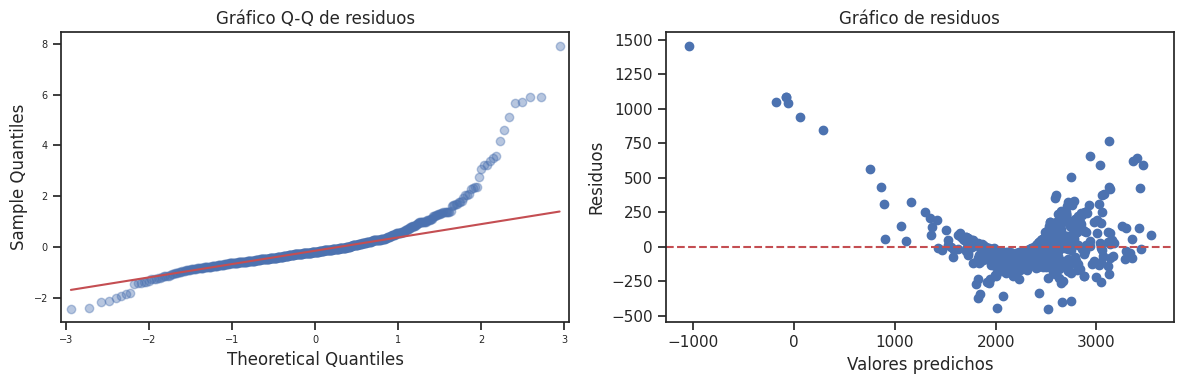

In [ ]:

# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(df_ej3["residuos"], fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ej3["pre"], df_ej3["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from scipy import stats

#res = stats.jarque_bera(df_ej3["residuos"])
#dist = stats.chi2(df=2)
#jb_val = np.linspace(0, 11, 100)
#pdf = dist.pdf(jb_val)
#fig, ax = plt.subplots(figsize=(8, 5))

#def jb_plot(ax):  # we'll re-use this
#    ax.plot(jb_val, pdf)
#    ax.set_title("Jarque-Bera Null Distribution")
#    ax.set_xlabel("statistic")
#    ax.set_ylabel("probability density")

#fig, ax = plt.subplots(figsize=(8, 5))
#jb_plot(ax)
#pvalue = dist.sf(res.statistic)
#annotation = (f'p-value={pvalue:.6f}')
#props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
#_ = ax.annotate(annotation, (7.5, 0.01), (8, 0.05))
#i = jb_val >= res.statistic  # indices of more extreme statistic values

#ax.fill_between(jb_val[i], y1=0, y2=pdf[i])
#ax.set_xlim(0, 11)
#ax.set_ylim(0, 0.3)

#plt.show()

##2.2  Regresion Ridge

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo

#X_std = sm.add_constant(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

ridge_reg = linear_model.RidgeCV(alphas=np.linspace(0.00001, 60, 10000))
ridge_reg.fit(X_train, y_train)
ridge_reg.coef_
ridge_reg.alpha_

10.26703499149915

para medir el performance se usas 4 medidas,Error cuadrático medio (MSE),
Raíz del error cuadrático medio (RMSE),Error absoluto medio (MAE) y Coeficiente de determinación (R²).

* Error cuadrático medio (MSE, por sus siglas en inglés): Es la media de los errores al cuadrado entre los valores predichos y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.
* Raíz del error cuadrático medio (RMSE, por sus siglas en inglés): Es la raíz cuadrada del MSE y proporciona una medida del error promedio en la misma escala que la variable objetivo. Al igual que el MSE, cuanto menor sea el RMSE, mejor será el rendimiento del modelo
* Error absoluto medio (MAE, por sus siglas en inglés): Es la media de los errores absolutos entre los valores predichos y los valores reales. Proporciona una medida promedio del error sin considerar la dirección. Al igual que el MSE y el RMSE, se busca minimizar el MAE.
* Coeficiente de determinación (R²): Proporciona una medida de la proporción de la varianza en la variable objetivo que es predecible a partir de las variables predictoras. Un valor de R² más cercano a 1 indica un mejor ajuste del modelo a los datos.

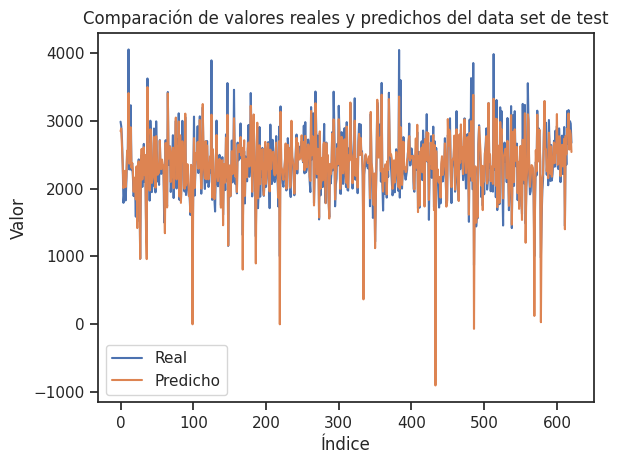

mse 33419.94278575131
rmse 182.8112217172439
mae 116.89507954759814
r2 0.8596605265743569


In [ ]:
# se aplica el modelo sobre x_test

y_pred = ridge_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

el modelo RidgeCV de scikit-learn, no proporciona una forma directa de determinar qué variables son significativas. Esto se debe a que RidgeCV utiliza métodos de regularización que penalizan los coeficientes de las variables, en lugar de realizar pruebas de significancia estadística sobre ellos.

Sin embargo, se puede  obtener una idea de la importancia relativa de las variables en el modelo de RidgeCV al examinar los valores absolutos de los coeficientes estimados. Los coeficientes más grandes en magnitud indicarán una mayor contribución relativa de esas variables al modelo.

In [ ]:
# Obtener los nombres de las variables

y_pred = ridge_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})
real_values = real_values.reset_index(drop=True)

df_ejridge = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ejridge["residuos"]=real_values["real"]-predicted_values["pre"]
df_ejridge["residuos2"]=df_ejridge["residuos"]**2
#df_ejridge["residuos2"].sort_values()


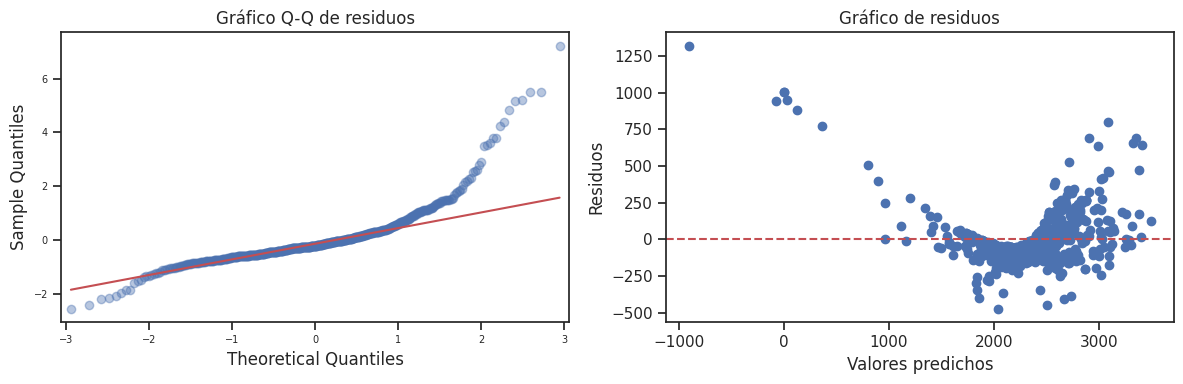

In [ ]:
# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(df_ejridge["residuos"], fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ejridge["pre"], df_ejridge["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## 2.3 Regresion Lasso

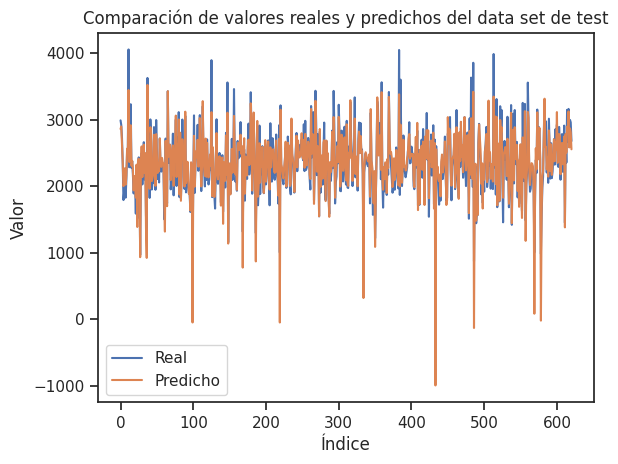

mse 33588.7287317094
rmse 183.27228031458932
mae 114.46778272622278
r2 0.8589517482580904


In [ ]:


# Normalización de features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo

#X_std = sm.add_constant(X_std )
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

lasso_reg = linear_model.LassoCV(alphas=np.linspace(0.00001, 60, 10000))
lasso_reg.fit(X_train, y_train)
lasso_reg.coef_
lasso_reg.alpha_

# se aplica el modelo sobre x_test

y_pred = lasso_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Error cuadrático medio:", r2)




Error cuadrático medio: 5162.699112970918
Error cuadrático medio: 0.9783204154592904


In [ ]:
# Obtener los nombres de las variables

y_pred = lasso_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})
real_values = real_values.reset_index(drop=True)

df_ejlasso = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ejlasso["residuos"]=real_values["real"]-predicted_values["pre"]
df_ejlasso["residuos2"]=df_ejlasso["residuos"]**2
#df_ejlasso["residuos2"].sort_values()

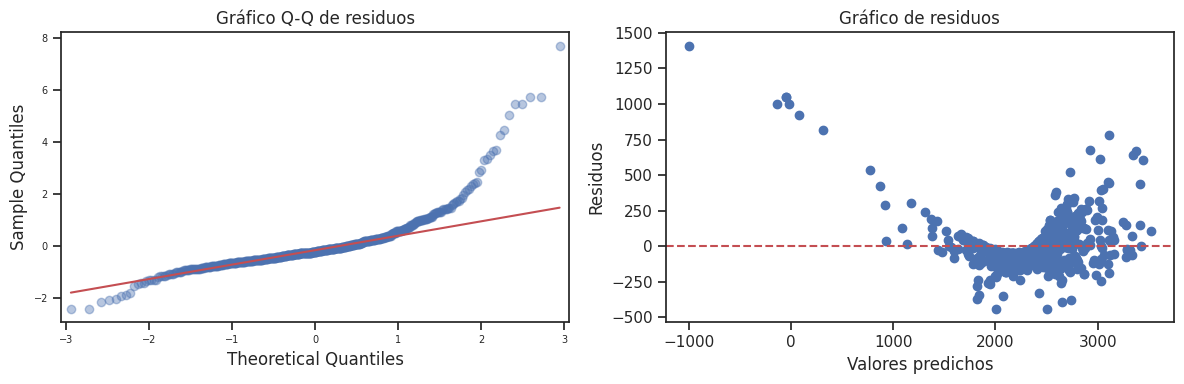

In [ ]:
# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(df_ejlasso["residuos"], fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ejlasso["pre"], df_ejlasso["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#3. Regresion de dataBarrios_2 sin tener en cuenta el precio total

## 3.1. Regresion lineal multiple

In [ ]:
# Se definen dummies para localidad, tipo de propiedad y barrio (esto es porque dentro de cada barrios existen distintos niveles de localidad, ejemplo dentro de Caballito esta la localidad de Parque Centenario)

dataBarrios_2["surface_total_in_m2"] = dataBarrios_2["surface_total_in_m2"].astype(int)
dataDummies = pd.get_dummies(dataBarrios_2[["localidad", "property_type", "place_name"]], drop_first=True)
#dataDummies_1 = pd.get_dummies(dataBarrios_2["ambientes"], drop_first=True)
dataUnida = pd.concat([dataBarrios_2, dataDummies], axis=1)
#dataUnida = pd.concat([dataUnida, dataDummies_1], axis=1)
dataBarrios_2

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,state_name,localidad,ambientes,tamano,preciom2
16,apartment,CABALLITO,-34.622211,-58.439128,110000.0,50,50.0,CAPITAL FEDERAL,Caballito,3,N,2200.000000
17,apartment,CABALLITO,-34.623894,-58.446861,170500.0,100,46.0,CAPITAL FEDERAL,Caballito,2,N,1705.000000
20,apartment,CABALLITO,-34.628786,-58.427783,108000.0,70,67.0,CAPITAL FEDERAL,Caballito,3,N,1542.857143
24,apartment,ALMAGRO,NaN,NaN,109900.0,50,40.0,CAPITAL FEDERAL,Almagro,2,N,2198.000000
32,apartment,CABALLITO,-34.620725,-58.438704,128000.0,51,51.0,CAPITAL FEDERAL,Caballito,2,N,2509.803922
...,...,...,...,...,...,...,...,...,...,...,...,...
26201,apartment,CABALLITO,-34.625407,-58.446055,170000.0,63,63.0,CAPITAL FEDERAL,Caballito,3,N,2698.412698
26214,PH,VILLA CRESPO,-34.605780,-58.460082,144900.0,90,45.0,CAPITAL FEDERAL,Villa Crespo,3,N,1610.000000
26227,apartment,CABALLITO,-34.622198,-58.429156,160000.0,78,70.0,CAPITAL FEDERAL,Caballito,3,N,2051.282051
26345,apartment,CABALLITO,-34.620403,-58.441022,147000.0,77,77.0,CAPITAL FEDERAL,Caballito,3,N,1909.090909


In [ ]:
dataUnida.head()

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,state_name,localidad,ambientes,...,preciom2,localidad_Almagro,localidad_Caballito,localidad_Parque Centenario,localidad_Villa Crespo,property_type_apartment,property_type_house,property_type_store,place_name_CABALLITO,place_name_VILLA CRESPO
16,apartment,CABALLITO,-34.622211,-58.439128,110000.0,50,50.0,CAPITAL FEDERAL,Caballito,3,...,2200.000000,0,1,0,0,1,0,0,1,0
17,apartment,CABALLITO,-34.623894,-58.446861,170500.0,100,46.0,CAPITAL FEDERAL,Caballito,2,...,1705.000000,0,1,0,0,1,0,0,1,0
20,apartment,CABALLITO,-34.628786,-58.427783,108000.0,70,67.0,CAPITAL FEDERAL,Caballito,3,...,1542.857143,0,1,0,0,1,0,0,1,0
24,apartment,ALMAGRO,NaN,NaN,109900.0,50,40.0,CAPITAL FEDERAL,Almagro,2,...,2198.000000,1,0,0,0,1,0,0,0,0
32,apartment,CABALLITO,-34.620725,-58.438704,128000.0,51,51.0,CAPITAL FEDERAL,Caballito,2,...,2509.803922,0,1,0,0,1,0,0,1,0


In [ ]:
# Regresión de preciom2 sin tener en cuenta la variable precio total como feature


# Define the dependent variable
y = dataUnida['preciom2']

# Define the independent variables
X = dataUnida.drop(['tamano', 'place_name', 'property_type', 'preciom2', 'lat', 'lon', 'state_name', 'localidad', 'price_aprox_usd'], axis=1)

# Add an intercept term to the independent variables
X= sm.add_constant(X)
X["surface_total_in_m22"]=X["surface_total_in_m2"]**2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model1 = sm.OLS(endog = y_train,exog = X_train).fit()

print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:               preciom2   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     112.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          1.58e-208
Time:                        18:08:03   Log-Likelihood:                -18560.
No. Observations:                2483   AIC:                         3.714e+04
Df Residuals:                    2471   BIC:                         3.721e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

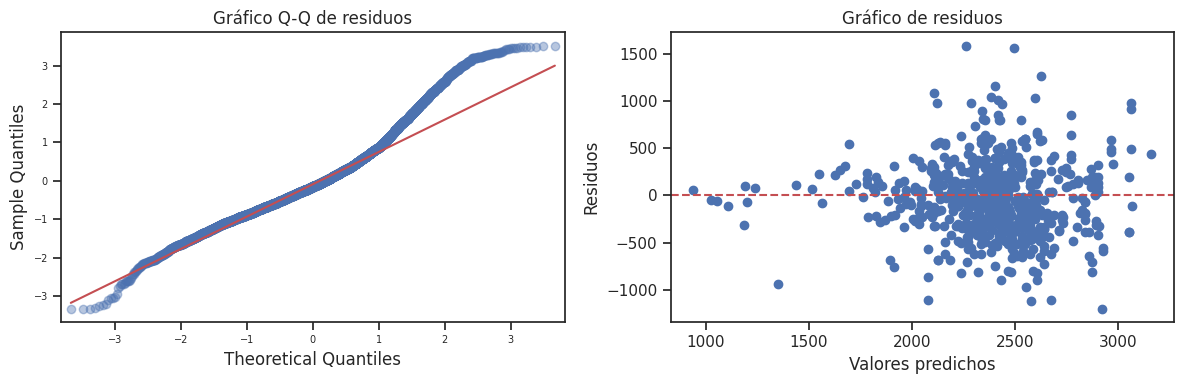

In [ ]:
# Análisis de los residuos

y_test

y_pred = model1.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})


df_ej3 = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ej3["residuos"]=real_values["real"]-predicted_values["pre"]
df_ej3["residuos2"]=df_ej3["residuos"]**2
#df_ej3["residuos2"].sort_values()

# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(residuals, fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ej3["pre"], df_ej3["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##3.2. Regresion Ridge

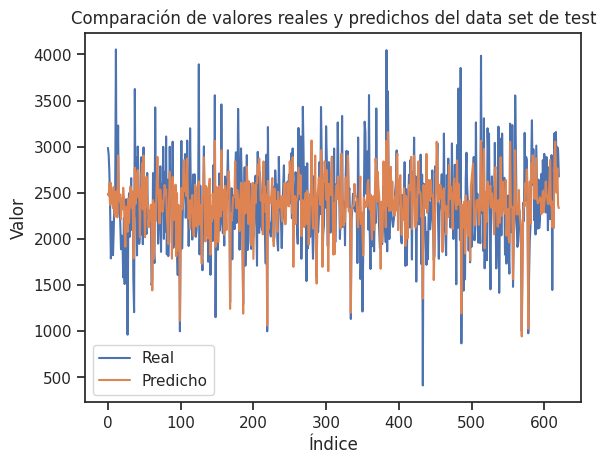

mse 154220.36650055618
rmse 392.70900995591654
mae 305.4667644294615
r2 0.35238653264764463


In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo

X_std = sm.add_constant(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

ridge_reg = linear_model.RidgeCV(alphas=np.linspace(0.00001, 60, 10000))
ridge_reg.fit(X_train, y_train)
ridge_reg.coef_
ridge_reg.alpha_

# se aplica el modelo sobre x_test

y_pred = ridge_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

##3.3 Regresion Lasso

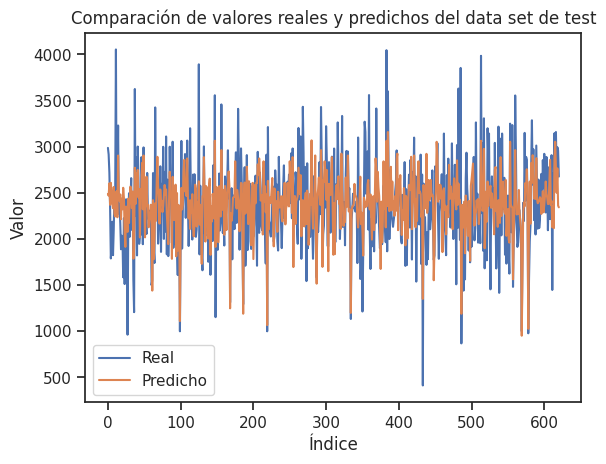

mse 154189.29049926632
rmse 392.6694417691124
mae 305.4118670060022
r2 0.35251702927012996


In [ ]:
# Normalización de features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo

X_std = sm.add_constant(X_std )
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

lasso_reg = linear_model.LassoCV(alphas=np.linspace(0.00001, 60, 10000))
lasso_reg.fit(X_train, y_train)
lasso_reg.coef_
lasso_reg.alpha_

# se aplica el modelo sobre x_test

y_pred = lasso_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

#4. Regresion en caba (se realiza una regresión tomando la información de todos los barrios de CABA)

## 4.1. Regresion multiple

In [ ]:
data=pd.read_excel("/content/baseCABA1.xlsx")

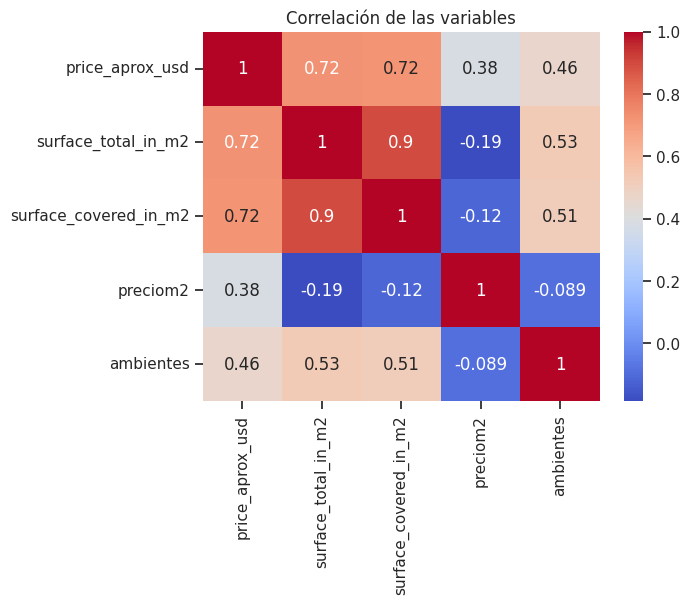

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = data[["price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","preciom2","ambientes"]]
correlation_matrix = data1.corr()

# Crear el correlograma utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Correlación de las variables')
plt.show()

In [ ]:


dataDummies = pd.get_dummies(data[["place_name",'property_type']], drop_first=True)
dataUnida = pd.concat([data, dataDummies], axis=1)
dataUnida.head()

# Define the dependent variable
y = dataUnida['preciom2']

# Define the independent variables
X = dataUnida.drop(['tamano', 'place_name', 'property_type', 'preciom2', 'lat', 'lon', 'state_name', 'localidad', 'price_aprox_usd'], axis=1)

# Add an intercept term to the independent variables
X= sm.add_constant(X)
X["surface_total_in_m22"]=X["surface_total_in_m2"]**2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model111 = sm.OLS(endog = y_train,exog = X_train).fit()

print(model111.summary())

                            OLS Regression Results                            
Dep. Variable:               preciom2   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     315.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:08:14   Log-Likelihood:            -1.6792e+05
No. Observations:               21114   AIC:                         3.360e+05
Df Residuals:                   21058   BIC:                         3.364e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

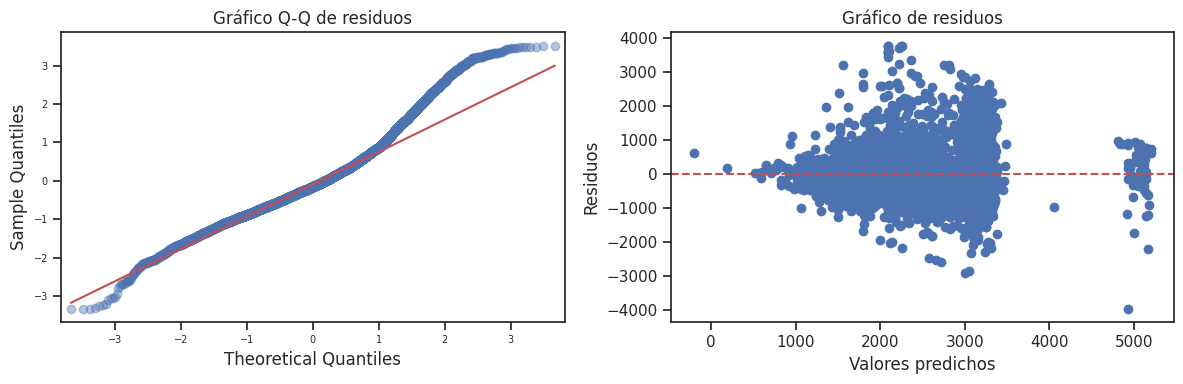

In [ ]:

y_pred = model111.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'pre': y_pred})
real_values = pd.DataFrame({'real': y_test})


df_ej333 = pd.merge(predicted_values,real_values,left_index=True, right_index=True)
df_ej333["residuos"]=real_values["real"]-predicted_values["pre"]
df_ej333["residuos2"]=df_ej333["residuos"]**2
#df_ej333["residuos2"].sort_values()

# Gráfico Q-Q de residuos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sm.qqplot(residuals, fit=True, line='q', alpha=0.4, lw=2, ax=ax1)
ax1.set_title('Gráfico Q-Q de residuos')
ax1.tick_params(labelsize=7)

# Gráfico de residuos
ax2.scatter(df_ej333["pre"], df_ej333["residuos"])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Valores predichos')
ax2.set_ylabel('Residuos')
ax2.set_title('Gráfico de residuos')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

mse 476677.89552985353
rmse 690.4186378783916
mae 491.4533833225882
r2 0.4334159841222397


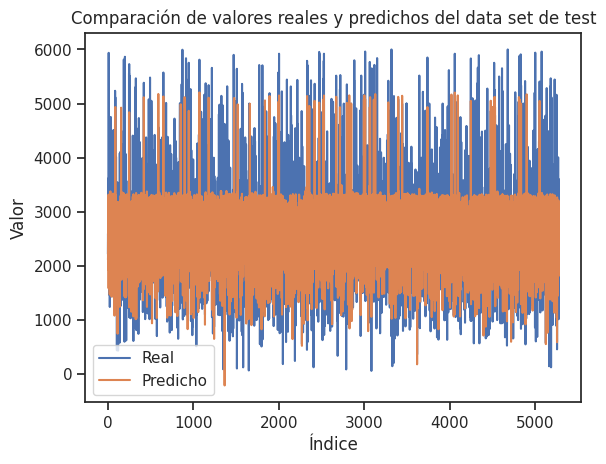

In [ ]:
y_pred = model111.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()


## 4.2. regresion ridge

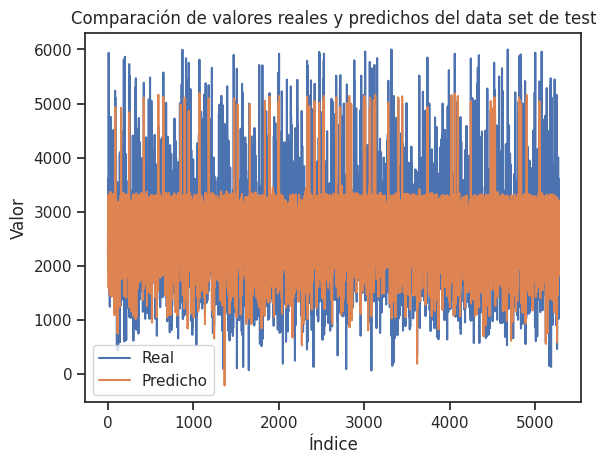

mse 477047.47831280815
rmse 690.6862372400424
mae 491.8120756724034
r2 0.43297669440620834


In [ ]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo
X_std = sm.add_constant(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

ridge_reg = linear_model.RidgeCV(alphas=np.linspace(0.00001, 60, 10000))
ridge_reg.fit(X_train, y_train)
ridge_reg.coef_
ridge_reg.alpha_

# se aplica el modelo sobre x_test

y_pred = ridge_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

## 4.3. regresion lasso

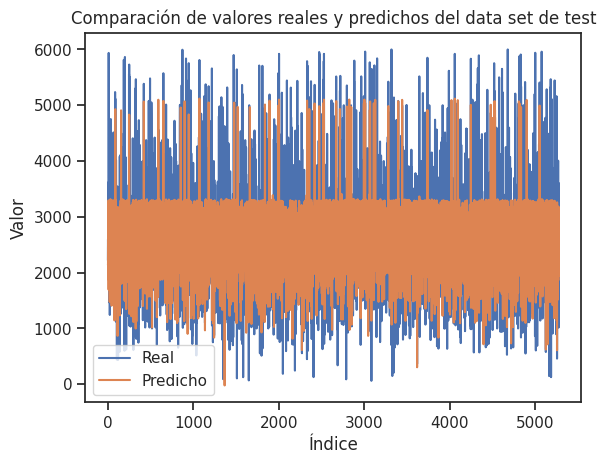

mse 478831.97464749415
rmse 691.9768599075363
mae 493.79444893770824
r2 0.430855624582944


In [ ]:
# Normalización de features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Separación entre entrenamiento y testeo

X_std = sm.add_constant(X_std )
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Se genera el modelo de Ridge con regularización

lasso_reg = linear_model.LassoCV(alphas=np.linspace(0.00001, 60, 10000))
lasso_reg.fit(X_train, y_train)
lasso_reg.coef_
lasso_reg.alpha_

# se aplica el modelo sobre x_test

y_pred = lasso_reg.predict(X_test)
arr_df = pd.DataFrame(y_pred)

predicted_values = pd.DataFrame({'valores': y_pred})
real_values = pd.DataFrame({'array': y_test})

# Crear un arreglo de índices
indices = np.arange(len(y_test))

# Graficar los valores reales y predichos
plt.plot(indices, real_values, label='Real')
plt.plot(indices, predicted_values, label='Predicho')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de valores reales y predichos del data set de test')

# Mostrar una leyenda con las etiquetas de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcula el MSE
mse = mean_squared_error(y_test,y_pred)

# Calcula el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcula el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print("mse",mse)
print("rmse",rmse)
print("mae",mae)
print("r2",r2)